<a href="https://colab.research.google.com/github/saidElamri/Fashion-MNIST-Clothing-/blob/main/prejct_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#fashion mnist

##project


In [1]:
# === IMPORTS ===
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.metrics import classification_report, confusion_matrix


In [2]:

#1) CHARGEMENT ET PREPARATION DES DONNEES ===
# Fashion MNIST: 28x28 grayscale, 10 classes.
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
labels unique: [0 1 2 3 4 5 6 7 8 9]


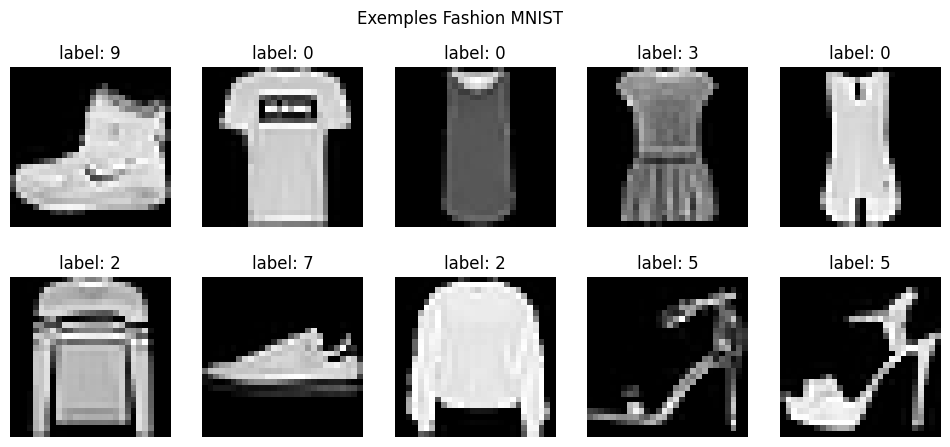

In [3]:
# Inspecter
print("x_train shape:", x_train.shape)  # (60000, 28, 28)
print("y_train shape:", y_train.shape)  # (60000,)
print("x_test shape:", x_test.shape)    # (10000, 28, 28)
print("labels unique:", np.unique(y_train))

# Normalisation -> [0,1]
x_train = x_train.astype("float32") / 255.0
x_test  = x_test.astype("float32")  / 255.0

# Garder format (N,28,28) pour l'inspection, mais model Dense attend Flatten -> OK.
# Optionnel: reshaper si nécessaire: x_train.reshape(-1, 28, 28)

# Affichage rapide d'exemples ===
fig, axes = plt.subplots(2,5, figsize=(12,5))
for i, ax in enumerate(axes.flatten()):
    ax.imshow(x_train[i], cmap='gray')
    ax.set_title(f"label: {y_train[i]}")
    ax.axis('off')
plt.suptitle("Exemples Fashion MNIST")
plt.show()



In [6]:
#2) CONSTRUCTION DU MODELE (DNN minimaliste) ===
def build_model(hidden1=256, hidden2=128, activation='relu', optimizer='adam', input_shape=(28,28)):
    model = keras.Sequential([
        layers.Flatten(input_shape=input_shape),
        layers.Dense(hidden1, activation=activation),
        layers.Dense(hidden2, activation=activation),
        layers.Dense(10, activation='softmax')
    ])
    model.compile(
        optimizer=optimizer,
        loss='sparse_categorical_crossentropy',  # labels entiers 0..9
        metrics=['accuracy']
    )
    return model

# Hyperparams par défaut
hp = {
    "hidden1": 256,
    "hidden2": 128,
    "activation": "relu",
    "optimizer": "adam",
    "batch_size": 128,
    "epochs": 10,
    "validation_split": 0.15,
    "patience": 3  # pour EarlyStopping
}

model = build_model(hp["hidden1"], hp["hidden2"], hp["activation"], hp["optimizer"])
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 235,146 (918.54 KB)

 Trainable params: 235,146 (918.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10

Epoch 1: val_loss improved from inf to 0.40804, saving model to best_dnn_fashionmnist.h5


399/399 - 6s - 15ms/step - accuracy: 0.8178 - loss: 0.5206 - val_accuracy: 0.8516 - val_loss: 0.4080
Epoch 2/10

Epoch 2: val_loss improved from 0.40804 to 0.39398, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.8666 - loss: 0.3706 - val_accuracy: 0.8599 - val_loss: 0.3940
Epoch 3/10

Epoch 3: val_loss improved from 0.39398 to 0.35992, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.8780 - loss: 0.3367 - val_accuracy: 0.8682 - val_loss: 0.3599
Epoch 4/10

Epoch 4: val_loss improved from 0.35992 to 0.33867, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.8858 - loss: 0.3099 - val_accuracy: 0.8751 - val_loss: 0.3387
Epoch 5/10

Epoch 5: val_loss did not improve from 0.33867
399/399 - 1s - 3ms/step - accuracy: 0.8931 - loss: 0.2897 - val_accuracy: 0.8768 - val_loss: 0.3496
Epoch 6/10

Epoch 6: val_loss improved from 0.33867 to 0.32875, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.8982 - loss: 0.2739 - val_accuracy: 0.8789 - val_loss: 0.3288
Epoch 7/10

Epoch 7: val_loss did not improve from 0.32875
399/399 - 1s - 3ms/step - accuracy: 0.9033 - loss: 0.2597 - val_accuracy: 0.8754 - val_loss: 0.3518
Epoch 8/10

Epoch 8: val_loss improved from 0.32875 to 0.32332, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.9072 - loss: 0.2486 - val_accuracy: 0.8868 - val_loss: 0.3233
Epoch 9/10

Epoch 9: val_loss improved from 0.32332 to 0.31914, saving model to best_dnn_fashionmnist.h5


399/399 - 1s - 3ms/step - accuracy: 0.9112 - loss: 0.2396 - val_accuracy: 0.8890 - val_loss: 0.3191
Epoch 10/10

Epoch 10: val_loss did not improve from 0.31914
399/399 - 2s - 4ms/step - accuracy: 0.9151 - loss: 0.2285 - val_accuracy: 0.8794 - val_loss: 0.3405
Restoring model weights from the end of the best epoch: 9.


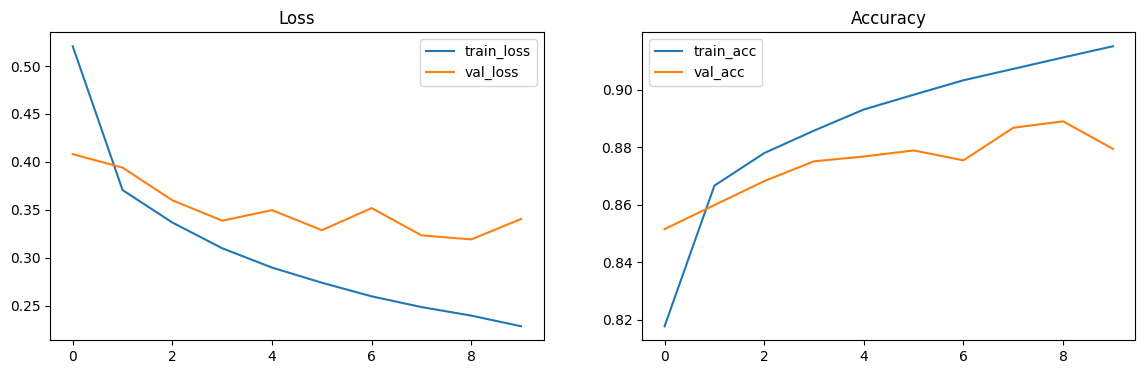

In [5]:
# === 3) CALLBACKS (EarlyStopping + ModelCheckpoint) ===
callbacks = [
    keras.callbacks.EarlyStopping(monitor='val_loss', patience=hp["patience"], restore_best_weights=True, verbose=1),
    keras.callbacks.ModelCheckpoint("best_dnn_fashionmnist.h5", save_best_only=True, monitor='val_loss', verbose=1)
]

#4) ENTRAINEMENT ===
history = model.fit(
    x_train, y_train,
    batch_size=hp["batch_size"],
    epochs=hp["epochs"],
    validation_split=hp["validation_split"],
    callbacks=callbacks,
    verbose=2
)

#5) VISUALISATION DE L'HISTORY ===
def plot_history(history):
    hist = history.history
    fig, ax = plt.subplots(1,2, figsize=(14,4))
    ax[0].plot(hist['loss'], label='train_loss')
    ax[0].plot(hist['val_loss'], label='val_loss')
    ax[0].set_title('Loss')
    ax[0].legend()
    ax[1].plot(hist['accuracy'], label='train_acc')
    ax[1].plot(hist['val_accuracy'], label='val_acc')
    ax[1].set_title('Accuracy')
    ax[1].legend()
    plt.show()

plot_history(history)



In [ ]:
# === 6) EVALUATION SUR LE TEST SET ===
test_results = model.evaluate(x_test, y_test, verbose=2)
print(f"Test loss: {test_results[0]:.4f} - Test accuracy: {test_results[1]:.4f}")

# === 7) MATRICE DE CONFUSION ET RAPPORT DE CLASSIFICATION ===
y_pred_probs = model.predict(x_test)
y_pred = np.argmax(y_pred_probs, axis=1)

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.title("Confusion matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification report:\n")
print(classification_report(y_test, y_pred, digits=4))

# === 8) SAUVEGARDE DU MODELE (bonus) ===
model.save("dnn_fashionmnist_final.h5")
print("Modèle sauvegardé en dnn_fashionmnist_final.h5")
